# Utilities

In [1]:
#| default_exp util

In [2]:
#| export
import jax.numpy as jnp
from jaxtyping import Array
import tensorflow_probability.substrates.jax as tfp
from tensorflow_probability.substrates.jax.distributions import MultivariateNormalLinearOperator as MVNLO


In [3]:
import jax
jax.config.update("jax_enable_x64", True)

## sampling from degenerate Multivariate normal

The `MultivariateNormalFullCovariance` distribution from `tfp` only supports non-singular covariance matrices for sampling, because internally a Cholesky decomposition is used, which is ambiguous for singular symmetric matrices. Instead, we use an eigenvalue decomposition.

In [4]:
#| export
LOFM = tfp.tf2jax.linalg.LinearOperatorFullMatrix
def MVN_degenerate(loc: Array, cov: Array) -> tfp.distributions.MultivariateNormalLinearOperator:
    evals, evecs = jnp.linalg.eigh(cov)
    sqrt_cov = jnp.einsum('...ij,...j->...ij', evecs, jnp.sqrt(evals))
    return MVNLO(loc=loc, scale=LOFM(sqrt_cov))

In [5]:
import jax.random as jrn
import matplotlib.pyplot as plt
import fastcore.test as fct

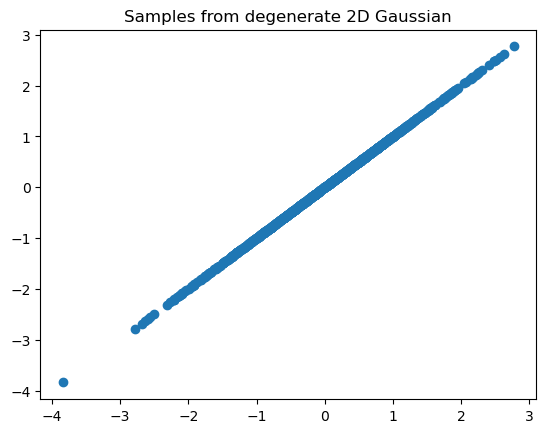

In [6]:
mu = jnp.zeros(2)
Sigma = jnp.array([[1., 1.], [1., 1.]])

N = 1000
samples = MVN_degenerate(mu, Sigma).sample(seed=jrn.PRNGKey(0), sample_shape=(N,))
plt.title("Samples from degenerate 2D Gaussian")
plt.scatter(samples[:, 0], samples[:, 1])
plt.show()

fct.test_close(samples @ jnp.array([[1.], [-1.]]), jnp.zeros(N))

In [7]:
#| hide
import nbdev; nbdev.nbdev_export()